Generative Adversarial Networks (GANs)
==============================

Initial Setup 
=========

1) Define the problem (What do you want generate ?) 
2) Choose the type of GAN required to solve the problem 
	Vanilla GAN.
	Conditional Gan (CGAN)
	Deep Convolutional GAN (DCGAN) : Upsampling, Batch Normalization
	CycleGAN.
	Generative Adversarial Text to Image Synthesis.
	Style GAN.
	Super Resolution GAN (SRGAN)
3) Define the Architecture of Generator (G) and Discriminator (D) separately
	Find size of Input, Output for G and D
4) Construct a new model (GAN) by Stacking / Combining the Generator and Discriminator 
----------------------------------------------------------------------------------------------------------

Steps for Training GAN
==================

1) Generate fake inputs  : 
Using the generator (G) to create fake inputs based on random noise or random normal noise.

--------------------------------------------------------

2) Train Discriminator in GAN (Make the Generator.Train=False)  
(either simultaneously by concatenating real and fake inputs, or one after the other)

a) For real data (Expected : Predicted Prob. should be 1)
	 loss(D(x),1) 	
	 Log Loss : log(D(x)) 
b)For fake (Expected : Predicted Prob. should be 0)  
	loss (D(G(z),0)   
	Log Loss : log (1- D(G(z) )

c) Find the combined Loss = 0.5 * (loss in Predicting "1" + loss in predicting "0")
 
d) Model fit / Train of GAN with freeze weights of Generator.
	Gradient Descent for Minimum loss


--------------------------------------------------------

3) Train generator with the output of the discriminator (or Train the whole model with discriminator’s weights are frozen)

For fake (Expected : Predicted Prob. should be "1")  
	log (1- D(G(z) ) 
a) Find the combined Loss = (loss in Predicting "1" for fake)
b) Model fit / Train of GAN with freeze weights of Discriminator.
	Gradient Descent for Minimum loss

--------------------------------------------------------------------------------------------

Reference : 

https://hub.packtpub.com/generative-adversarial-networks-using-keras/

https://www.youtube.com/watch?v=zYn4DIkskHA&t=335s

GitHuB
All GAN implementation with research paper
https://github.com/eriklindernoren/Keras-GAN

-----------------------------------------------------------------------------------------------------


In [39]:
import keras
import tensorflow as tf
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [40]:
(xtrain, ytrain), (xtest, ytest) = keras.datasets.mnist.load_data()

In [41]:
xtrain

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [42]:
xtrain=xtrain/255.0
xtest=xtest/255.0

In [43]:
xtrain.shape

(60000, 28, 28)

In [44]:
xtest.shape

(10000, 28, 28)

In [62]:
from keras.models import Sequential, Model
from keras.layers import Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, ReLU, LeakyReLU, Dropout,Input,BatchNormalization,UpSampling2D,Activation
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam

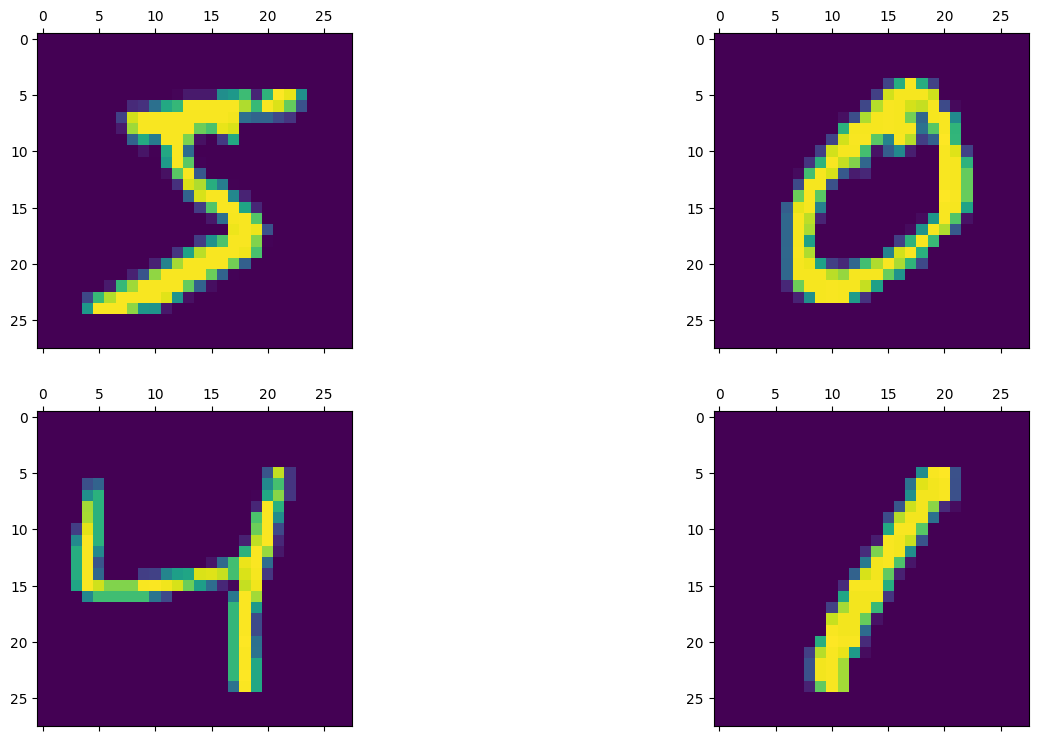

In [63]:
fig, axs = plt.subplots(2, 2, figsize=(16,9))
n=0
for i in range(0,2):
    for j in range(0,2):
        axs[i,j].matshow(xtrain[n])
        n=n+1
plt.show() 

In [64]:
xtrain[0].shape

(28, 28)

In [65]:
def generator(noise_shape=(100,)):
    input = Input(noise_shape)
    x = Dense(128 * 7 * 7, activation="relu")(input)
    x = Reshape((7, 7, 128))(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = UpSampling2D()(x)
    x = Conv2D(128, kernel_size=3, padding="same")(x)
    x = Activation("relu")(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = UpSampling2D()(x)
    x = Conv2D(64, kernel_size=3, padding="same")(x)
    x = Activation("relu")(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = Conv2D(1, kernel_size=3, padding="same")(x)
    out = Activation("tanh")(x)
    model = Model(input, out)
    print("-- Generator -- ")
    model.summary()
    return model

In [66]:
gen=generator()

-- Generator -- 
Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_11 (Dense)            (None, 6272)              633472    
                                                                 
 reshape_5 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 batch_normalization_13 (Bat  (None, 7, 7, 128)        512       
 chNormalization)                                                
                                                                 
 up_sampling2d_3 (UpSampling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14

In [71]:
def discriminator(img_shape):
    input = Input(img_shape)
    x =Conv2D(32, kernel_size=3, strides=2, padding="same")(input)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dropout(0.25)(x)
    x = Conv2D(64, kernel_size=3, strides=2, padding="same")(x)
    x = (LeakyReLU(alpha=0.2))(x)
    x = Dropout(0.25)(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = Conv2D(128, kernel_size=3, strides=2, padding="same")(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dropout(0.25)(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = Conv2D(256, kernel_size=3, strides=1, padding="same")(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dropout(0.25)(x)
    x = Flatten()(x)
    out = Dense(1, activation='sigmoid')(x)

In [72]:
dis=discriminator((28,28,1))

In [74]:
z = Input(shape=(100,))
img = gen(z)
discriminator.trainable = False
real = dis(img)
combined = Model(z, real)

TypeError: 'NoneType' object is not callable

In [15]:
combined.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 10)]              0         
                                                                 
 model (Functional)          (None, 28, 28, 1)         122913    
                                                                 
 model_1 (Functional)        (None, 1)                 6153857   
                                                                 
Total params: 6,276,770
Trainable params: 6,275,874
Non-trainable params: 896
_________________________________________________________________


In [37]:
dis.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

gen.compile(loss='binary_crossentropy', optimizer='Adam')

combined.compile(loss='binary_crossentropy', optimizer='Adam')

In [38]:
num_examples = xtrain.shape[0]
num_batches = int(num_examples / float(32))
half_batch = int(32 / 2)
valid = np.ones((32, 1))
fake = np.zeros((32, 1))

In [ ]:
bat_per_epo = int(xtrain.shape[0] / 128)
half_batch = int(128 / 2)
for i in range(100):
    for j in range(bat_per_epo):
        X_real, y_real = generate_real_samples(dataset, half_batch)
        X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
        X, y = vstack((X_real, X_fake)), vstack((y_real, y_fake))
        d_loss, _ = d_model.train_on_batch(X, y)
        X_gan = generate_latent_points(latent_dim, n_batch)
        y_gan = ones((n_batch, 1))
        g_loss = gan_model.train_on_batch(X_gan, y_gan)
        print('>%d, %d/%d, d=%.3f, g=%.3f' % (i+1, j+1, bat_per_epo, d_loss, g_loss))
        if (i+1) % 10 == 0:
            summarize_performance(i, g_model, d_model, dataset, latent_dim)
 

1/1 [==============================] - 21s 21s/step
0
0) [D loss: 3.789098, acc.: 42.19%] [G loss: 13.423633]
1/1 [==============================] - 0s 33ms/step
1) [D loss: 4.207598, acc.: 70.31%] [G loss: 8.796522]
1/1 [==============================] - 0s 32ms/step
2) [D loss: 6.074360, acc.: 70.31%] [G loss: 1.357411]
1/1 [==============================] - 0s 33ms/step
3) [D loss: 2.199602, acc.: 76.56%] [G loss: 4.702316]
1/1 [==============================] - 0s 33ms/step
4) [D loss: 4.637119, acc.: 67.19%] [G loss: 2.441830]
1/1 [==============================] - 0s 56ms/step
5) [D loss: 1.189917, acc.: 84.38%] [G loss: 1.566796]
1/1 [==============================] - 0s 33ms/step
6) [D loss: 2.266752, acc.: 79.69%] [G loss: 0.421572]
1/1 [==============================] - 0s 30ms/step
7) [D loss: 0.053632, acc.: 96.88%] [G loss: 1.050956]
1/1 [==============================] - 0s 32ms/step
8) [D loss: 0.085106, acc.: 98.44%] [G loss: 0.969625]
1/1 [=============================

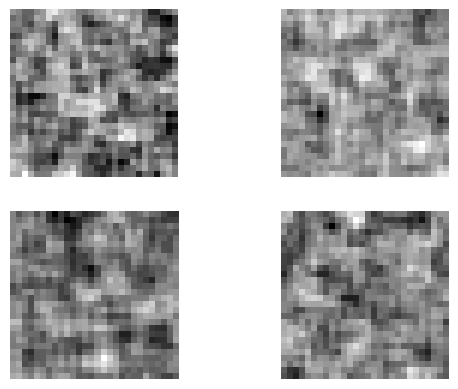

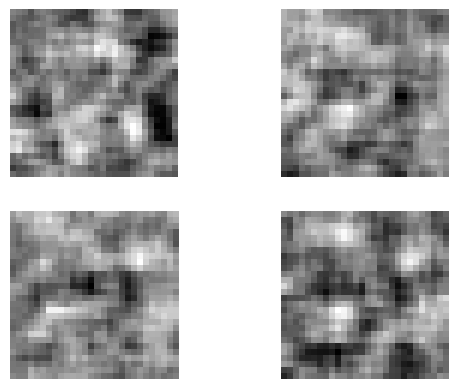

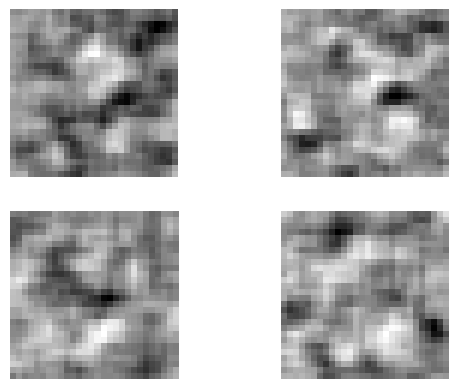

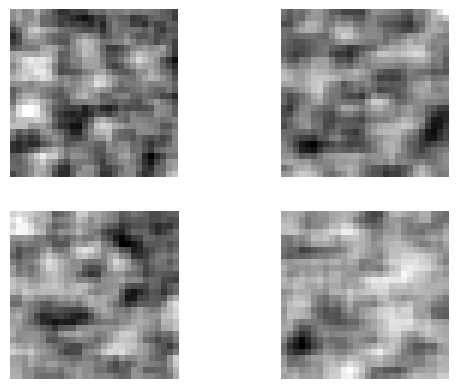

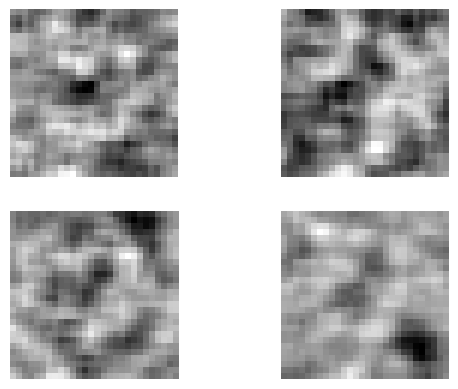

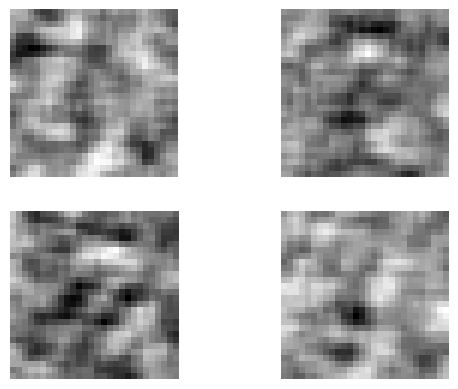

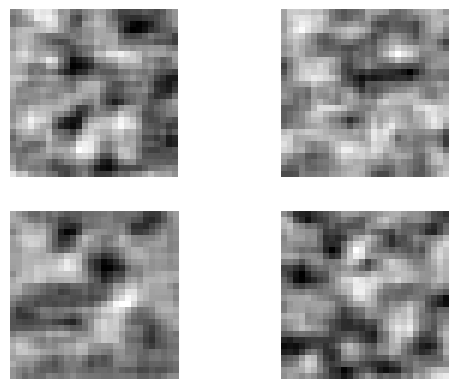

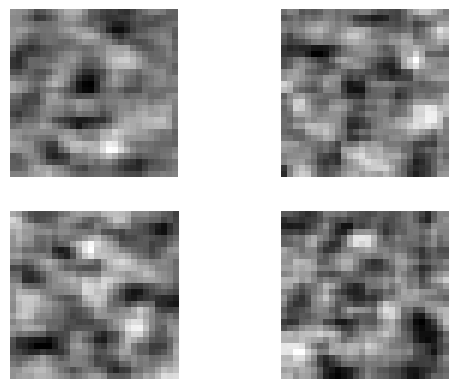

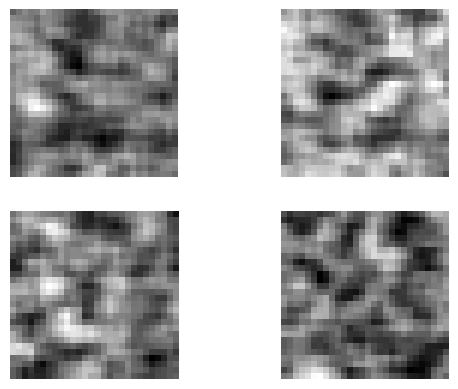

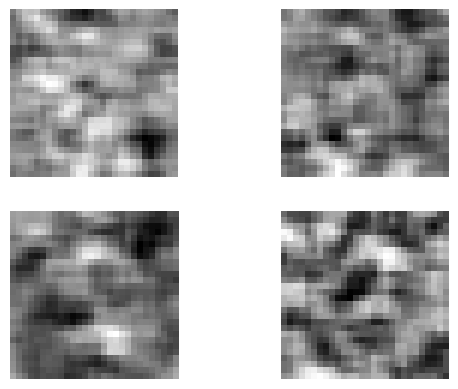

In [23]:
for epoch in range(100):
    idx = np.random.randint(0, xtrain.shape[0], 32)
    imgs = xtrain[idx]
    noise = np.random.normal(0, 1, (32, 10))
    gen_imgs = gen.predict(noise)
    
    if (epoch%10==0):
        print(epoch)
        fig, axs = plt.subplots(2, 2)
        cnt = 0
        for i in range(2):
            for j in range(2):
                axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
                axs[i, j].axis('off')
                cnt += 1
    
    d_loss_real = dis.train_on_batch(imgs, valid)
    d_loss_fake = dis.train_on_batch(gen_imgs, fake)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    
    g_loss = combined.train_on_batch(noise, valid)

    print ("%d) [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))
